In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cardekho=pd.read_csv(r"D:\BESANT\cardekho\cardekho_imputated.csv")

In [3]:
cardekho

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [4]:
cardekho.shape

(15411, 14)

In [5]:
cardekho.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
cardekho.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [7]:
cardekho.drop(columns=['Unnamed: 0', 'car_name', 'brand', 'model'],axis=1,inplace=True)

In [8]:
cardekho

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [9]:
cardekho['seller_type'].nunique()

3

In [10]:
cardekho['transmission_type'].nunique()

2

In [11]:
cardekho['fuel_type'].nunique()

5

In [12]:
cardekho['seller_type'].value_counts()

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

In [13]:
categorical_columns = (['seller_type', 'fuel_type', 'transmission_type'])

In [14]:
categorical_columns

['seller_type', 'fuel_type', 'transmission_type']

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(cardekho[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

car1 = pd.concat([cardekho.drop(categorical_columns, axis=1), one_hot_df], axis=1)


In [17]:
car1

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
x=car1.drop('selling_price',axis=1)
y=car1[['selling_price']]

In [19]:
x

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
y

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
15406,250000
15407,925000
15408,425000
15409,1225000


Linearity Check:

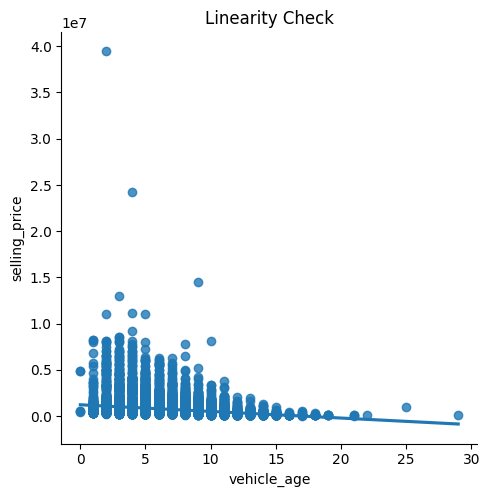

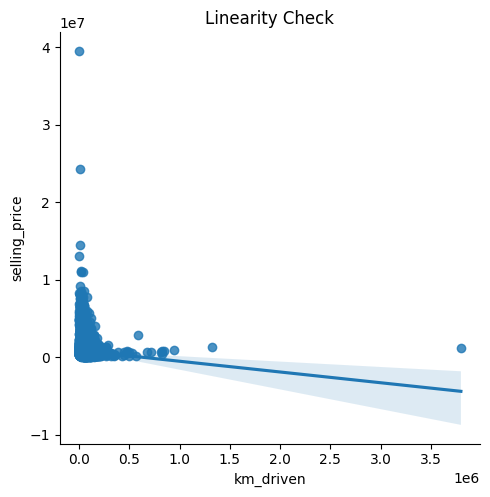

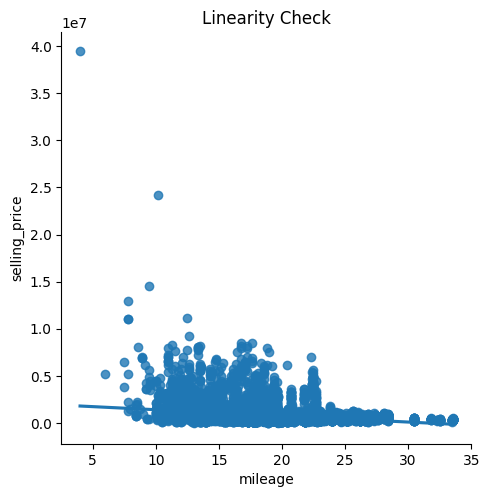

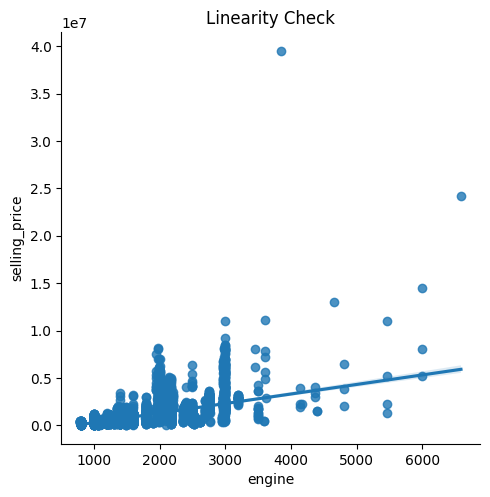

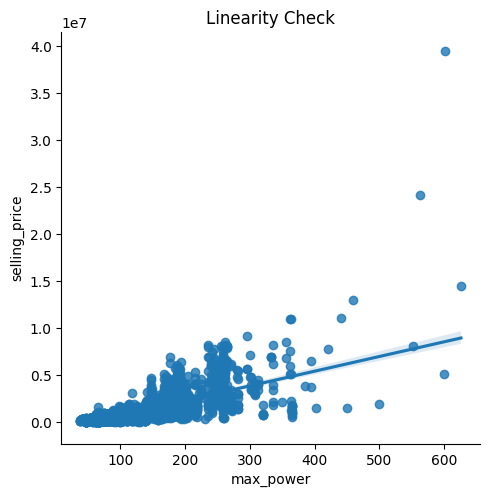

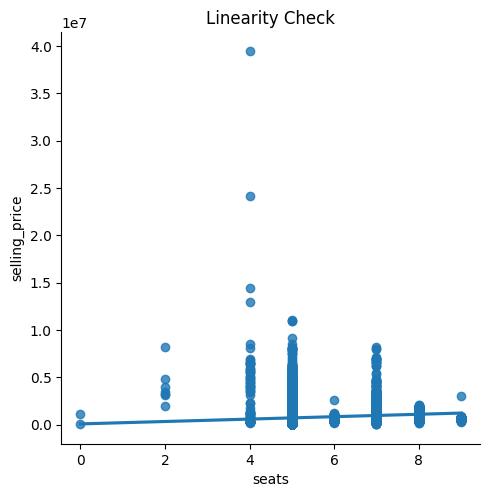

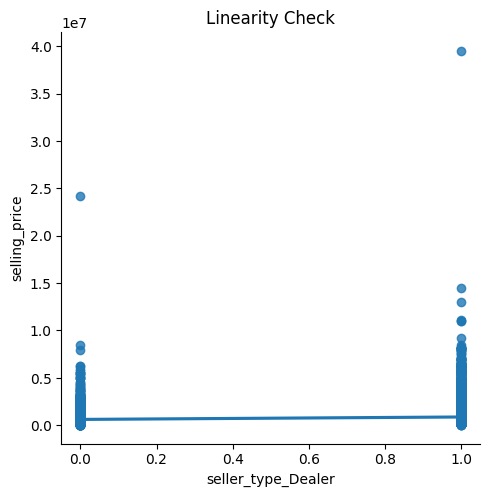

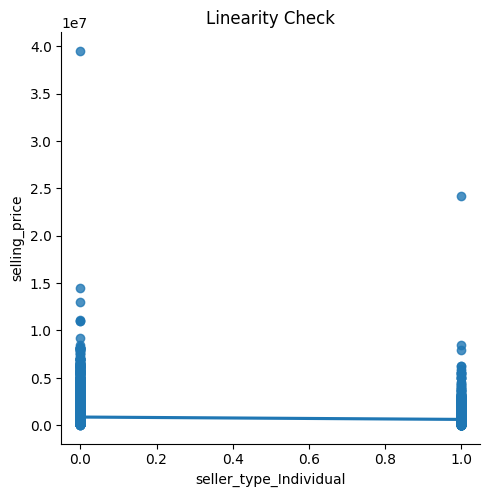

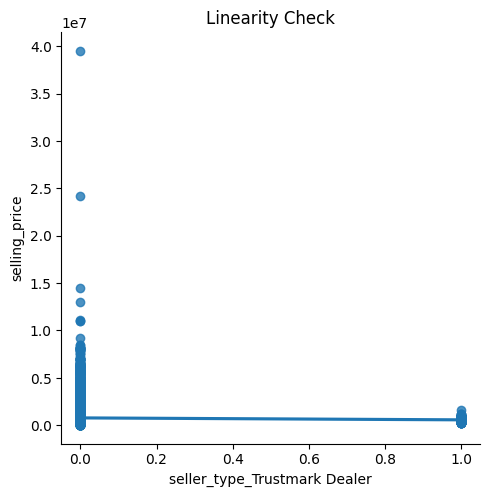

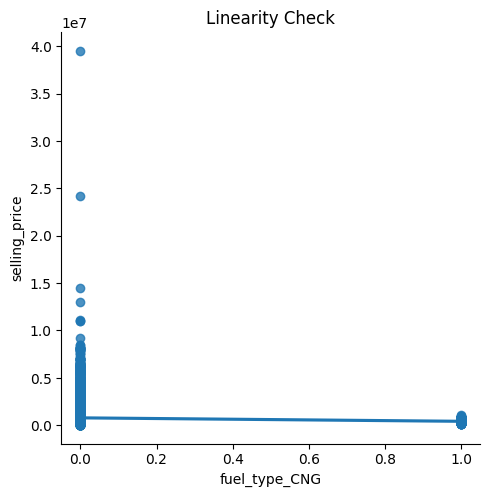

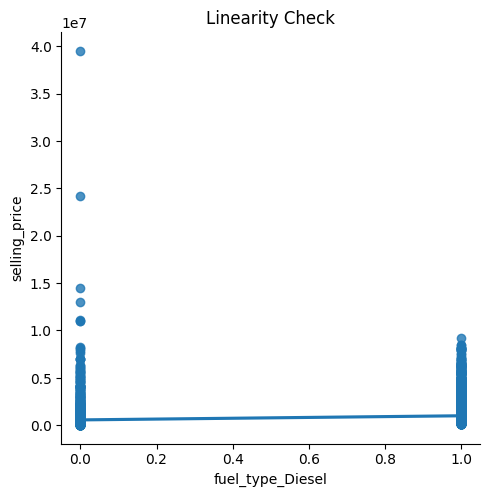

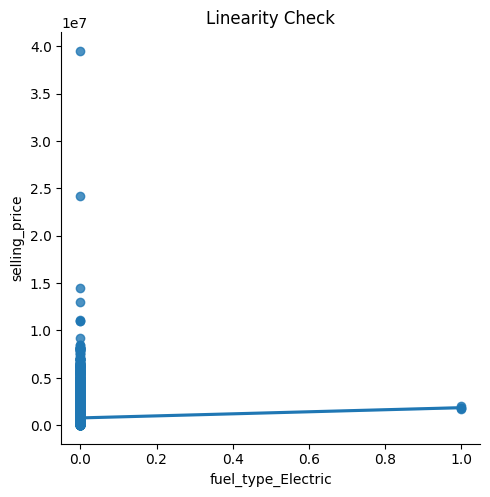

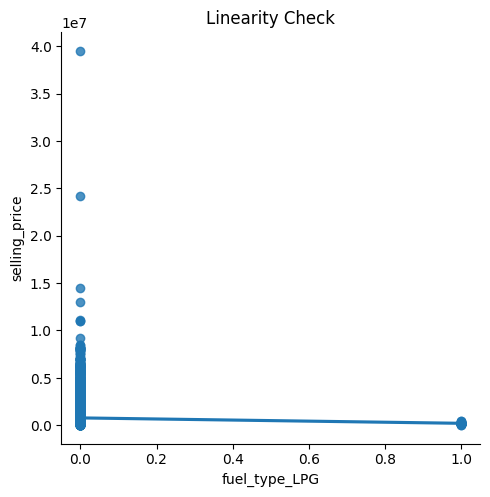

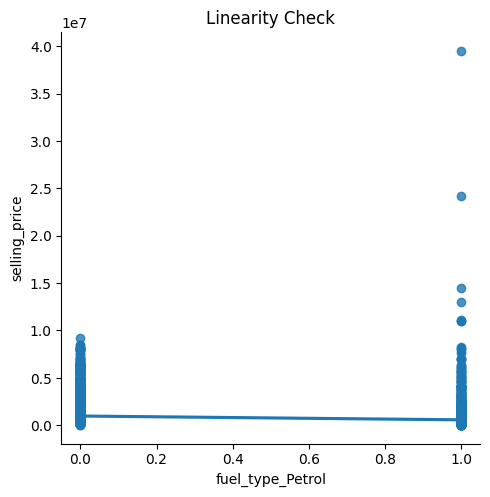

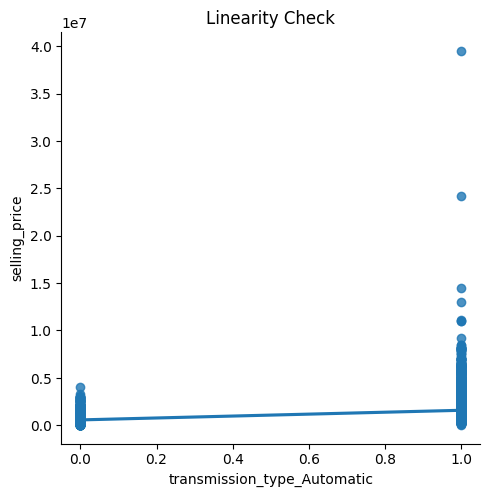

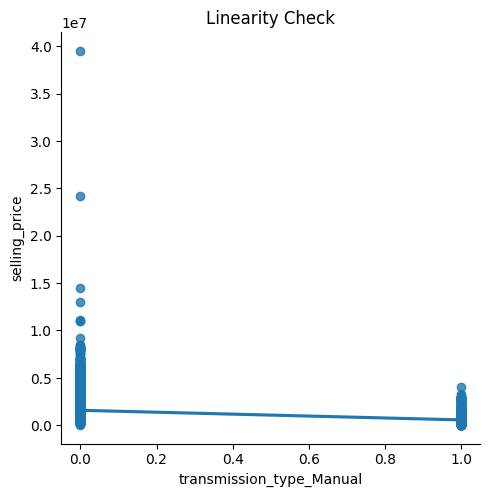

In [21]:
import seaborn as sns
for i in x: 
    sns.lmplot(x=i,y='selling_price',data = car1)
    plt.title("Linearity Check")
    plt.show()

Normality Check:

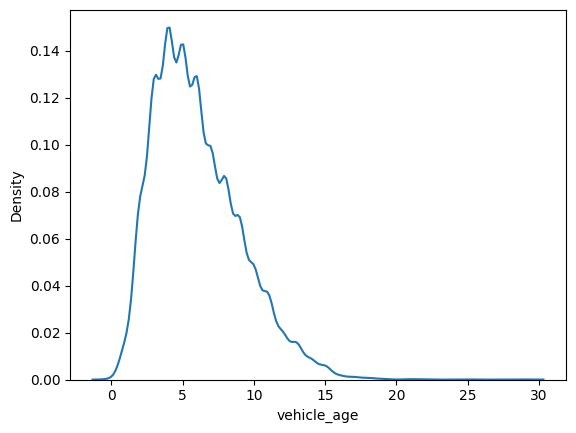

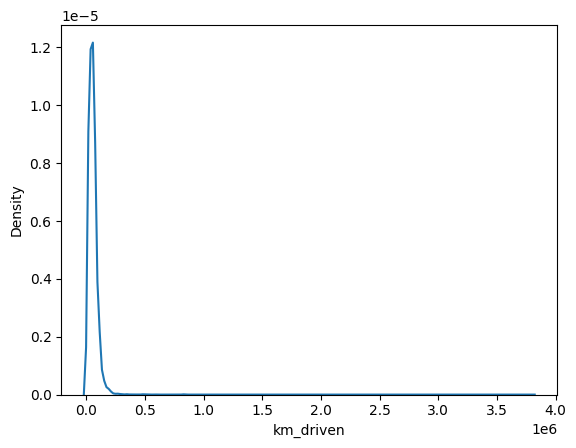

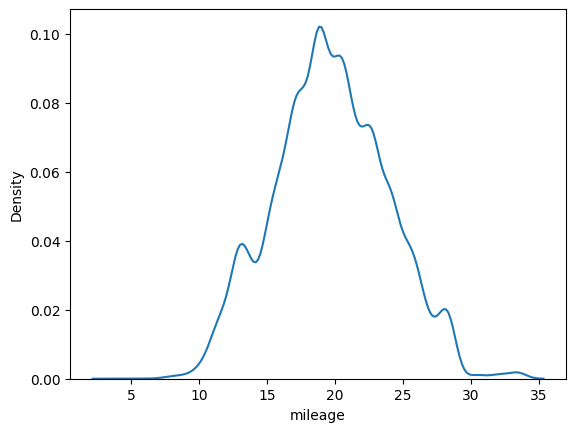

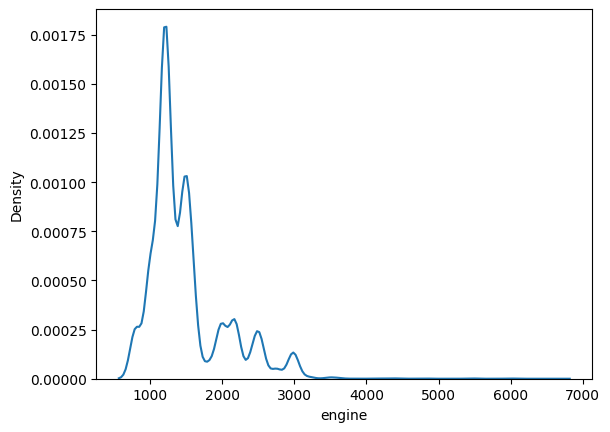

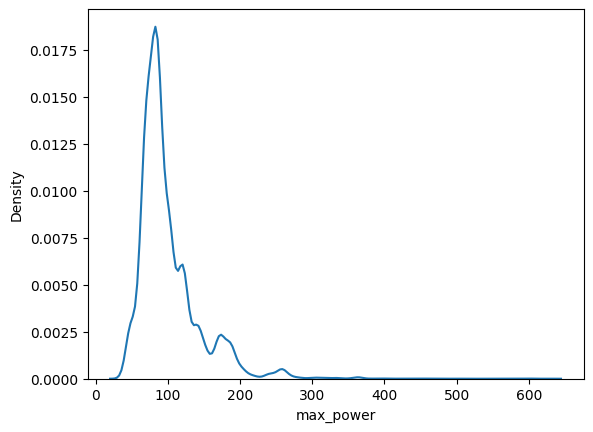

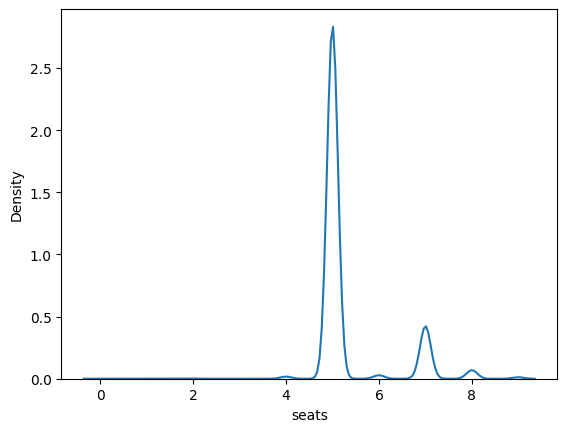

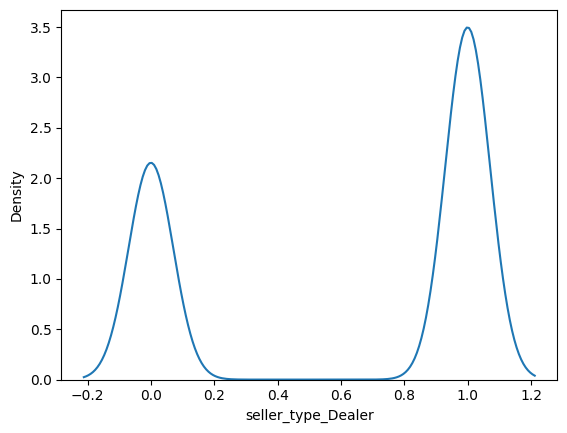

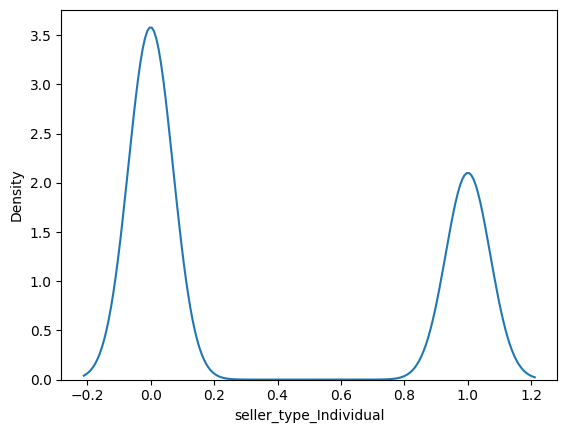

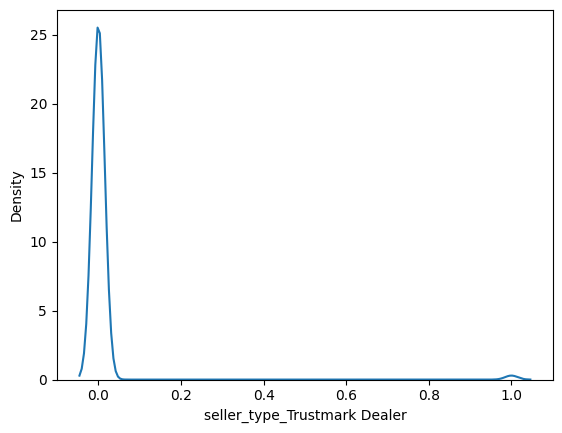

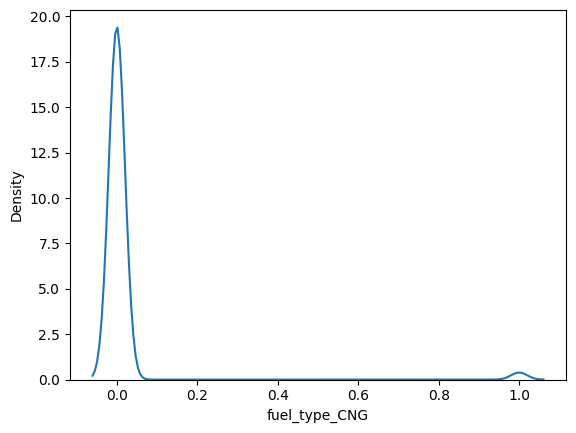

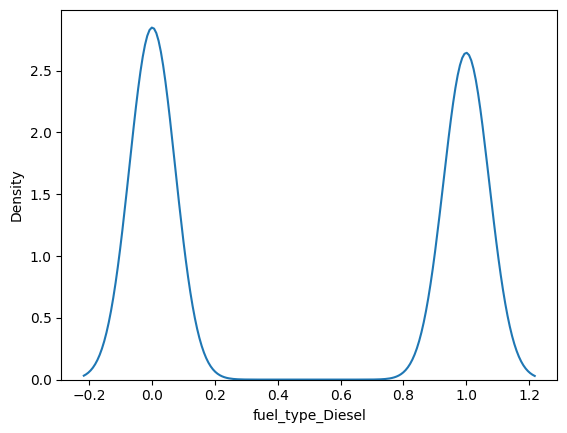

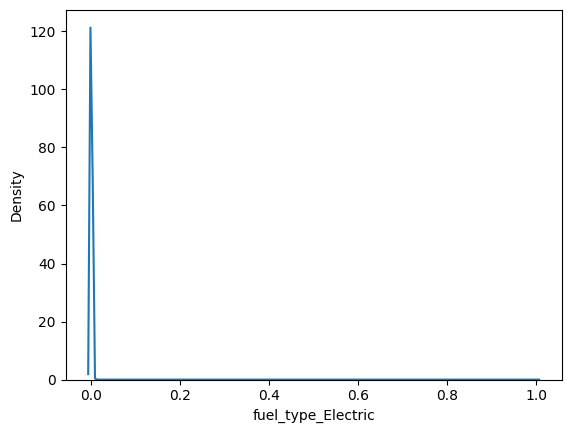

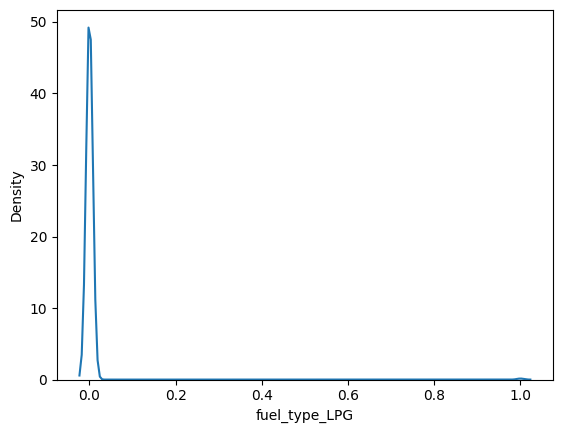

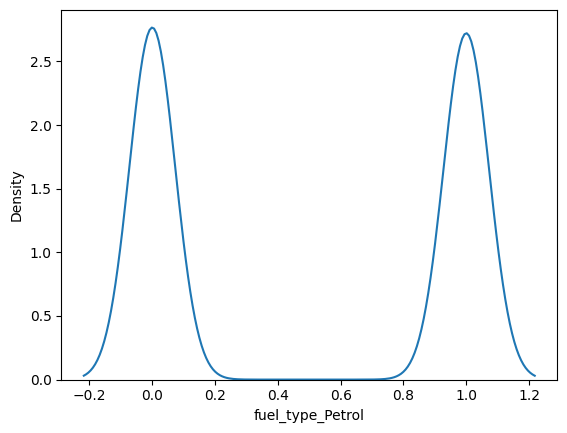

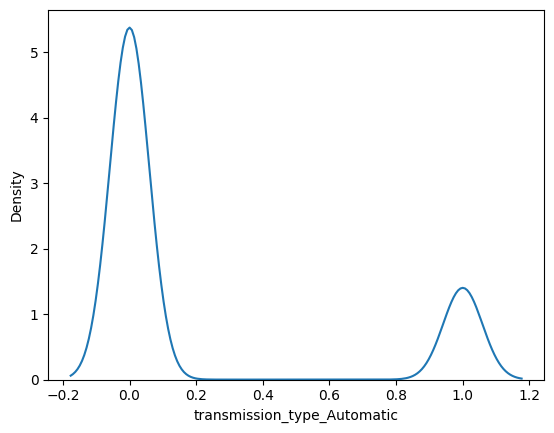

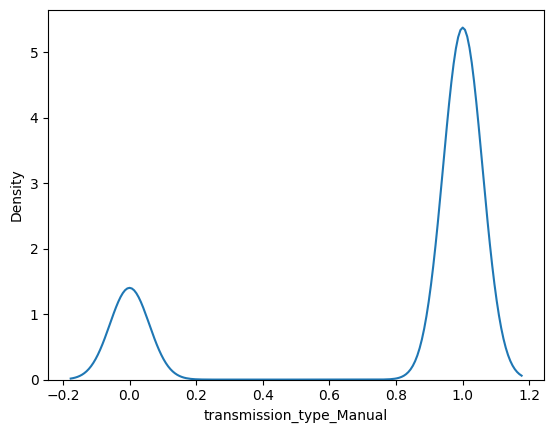

In [22]:
for i in x:
    sns.distplot(a=car1[i],hist=False)
    plt.show()

Multicollinearity:

In [23]:
car1.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851,0.045779,-0.032613,-0.061584,-0.024422,0.013594,-0.001531,0.089761,-0.016355,-0.080711,0.080711
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030,-0.048814,0.060044,-0.050116,-0.003294,0.249809,0.002812,0.022331,-0.251207,-0.073501,0.073501
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549,-0.079906,0.073703,0.030610,0.206865,0.082897,-0.002090,-0.023923,-0.137477,-0.282738,0.282738
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844,0.114754,-0.103192,-0.056123,-0.106117,0.494713,0.031167,-0.044654,-0.461256,0.348607,-0.348607
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236,0.185213,-0.177505,-0.040399,-0.117967,0.307386,0.021415,-0.050245,-0.269861,0.539448,-0.539448
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033,-0.049431,0.057600,-0.036079,-0.001724,0.336285,-0.006494,-0.021566,-0.333076,-0.058527,0.058527
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000,0.139037,-0.134589,-0.024193,-0.056400,0.242998,0.019436,-0.034035,-0.224222,0.459394,-0.459394
seller_type_Dealer,0.045779,-0.048814,-0.079906,0.114754,0.185213,-0.049431,0.139037,1.000000,-0.976345,-0.135806,0.028666,0.025361,0.004347,-0.028134,-0.030416,0.204218,-0.204218
seller_type_Individual,-0.032613,0.060044,0.073703,-0.103192,-0.177505,0.057600,-0.134589,-0.976345,1.000000,-0.081621,-0.041097,-0.006336,-0.003999,0.029547,0.014682,-0.201867,0.201867
seller_type_Trustmark Dealer,-0.061584,-0.050116,0.030610,-0.056123,-0.040399,-0.036079,-0.024193,-0.135806,-0.081621,1.000000,0.056173,-0.087869,-0.001717,-0.005702,0.072927,-0.016373,0.016373


Autoregression: Not present

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12328, 16), (3083, 16), (12328, 1), (3083, 1))

In [27]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_train_pred=mlr.predict(x_train)

In [36]:
y_test_pred=mlr.predict(x_test)

In [30]:
y_test_pred

array([[ 595567.1244111 ],
       [ 222032.17902709],
       [ 765870.49275465],
       ...,
       [ 451056.16611543],
       [ 659660.87439024],
       [1031999.15232042]], shape=(12328, 1))

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error

In [32]:
r2_train=r2_score(y_train,y_train_pred)

In [33]:
r2_train

0.6233270155387627

In [37]:
r2_test = r2_score(y_test,y_test_pred)
r2_test 

0.652134198602998

In [39]:
error_test = y_test - y_test_pred
error_test

,selling_price
13330,538592.637266
11955,-275305.126195
9169,119678.762805
4010,-656495.999749
14224,-215502.933931
...,...
7229,577285.557326
11843,309069.160538
6806,-55169.061881
12956,178492.945651


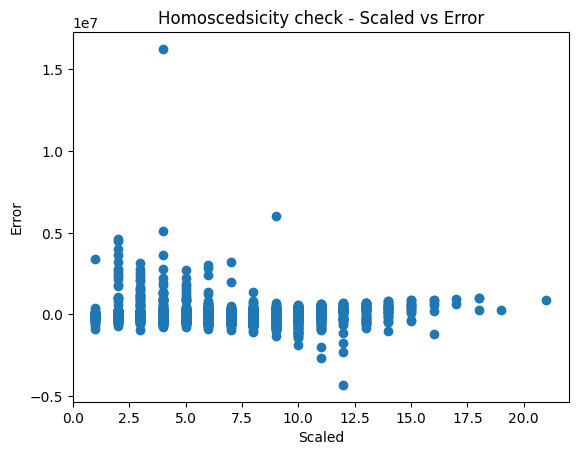

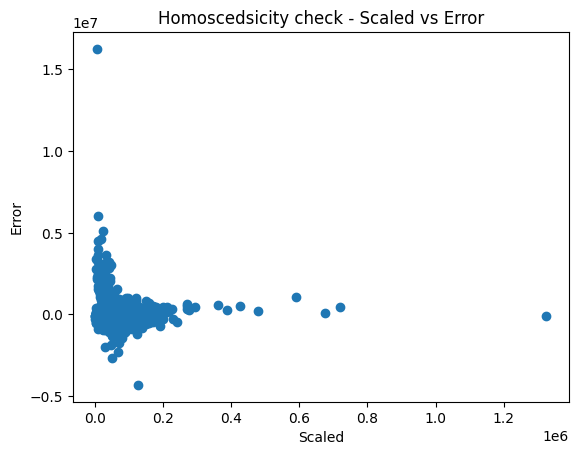

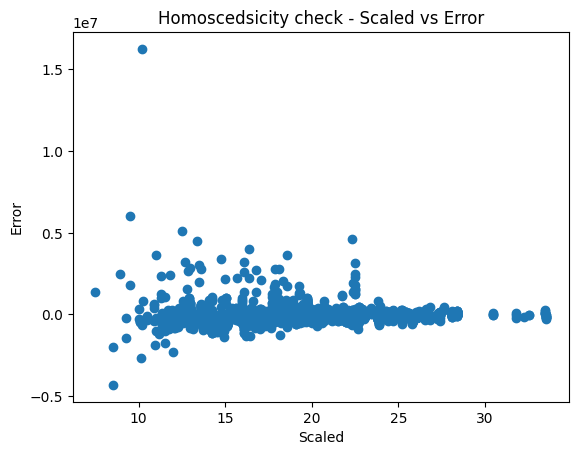

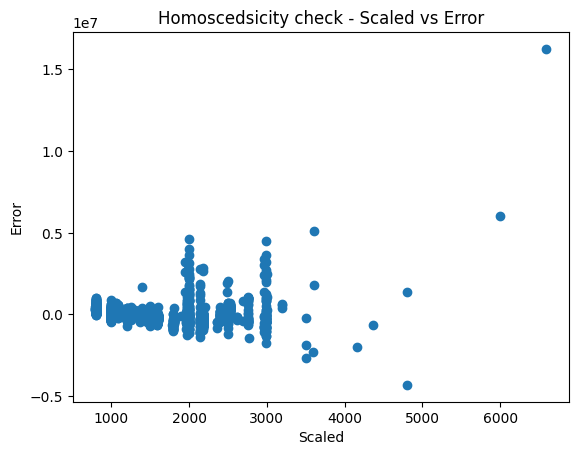

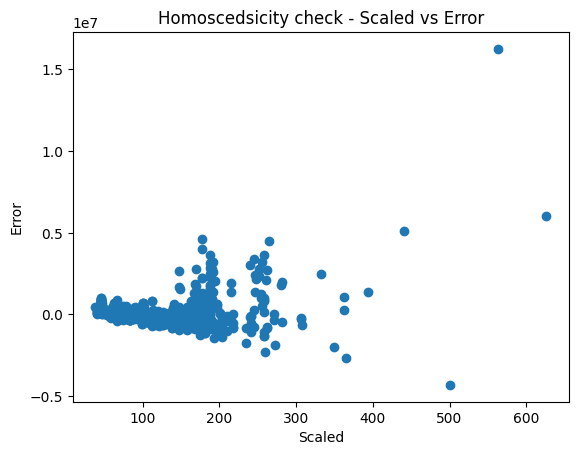

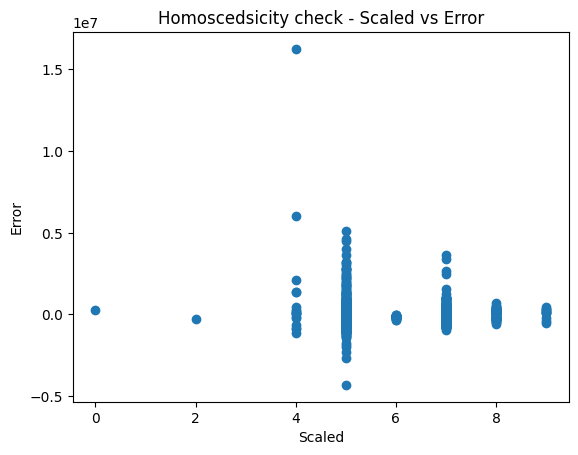

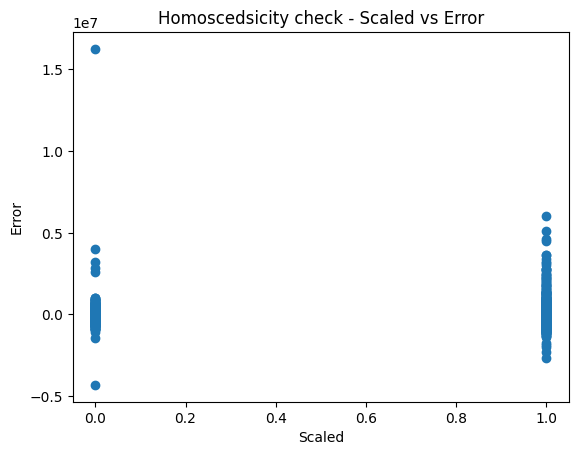

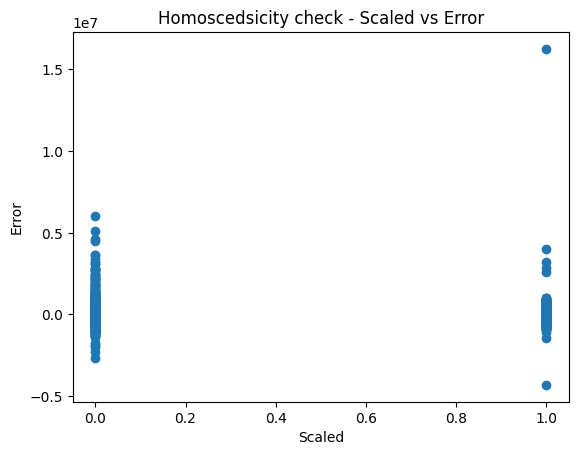

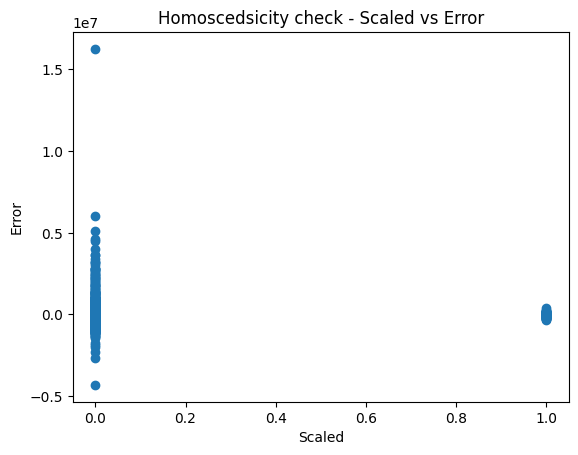

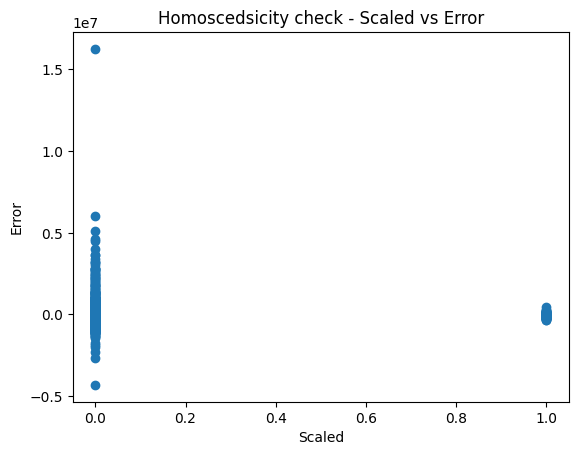

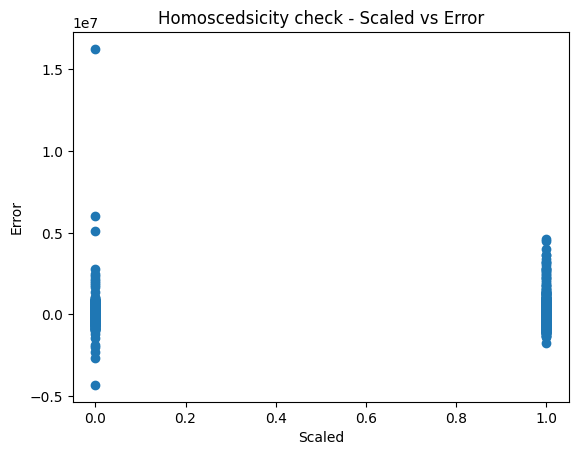

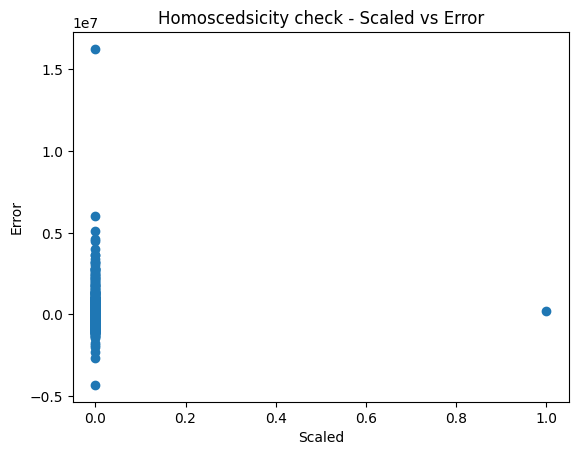

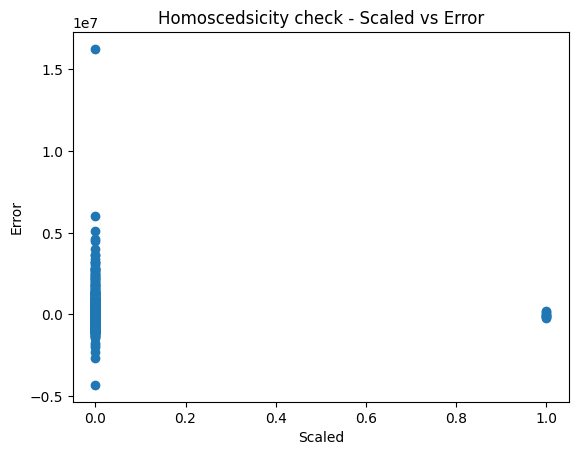

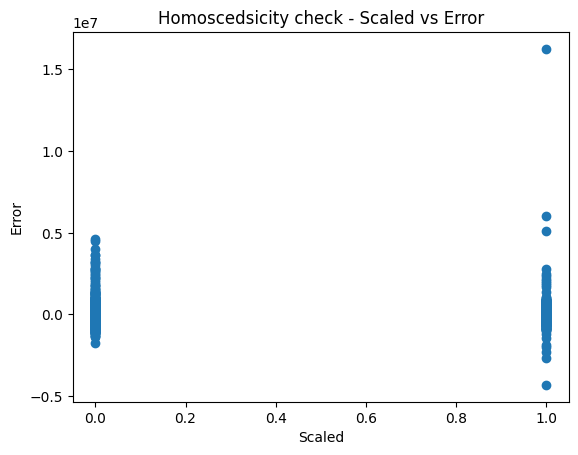

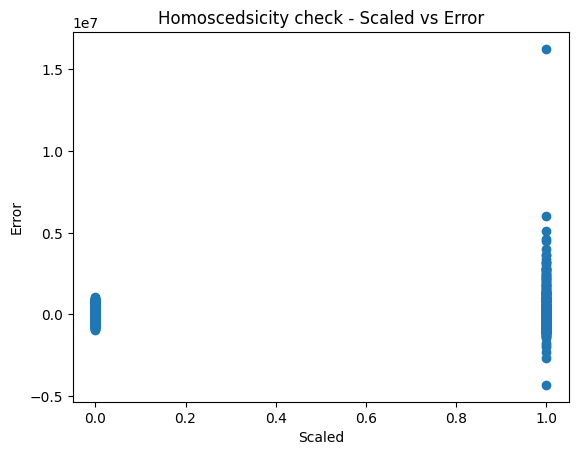

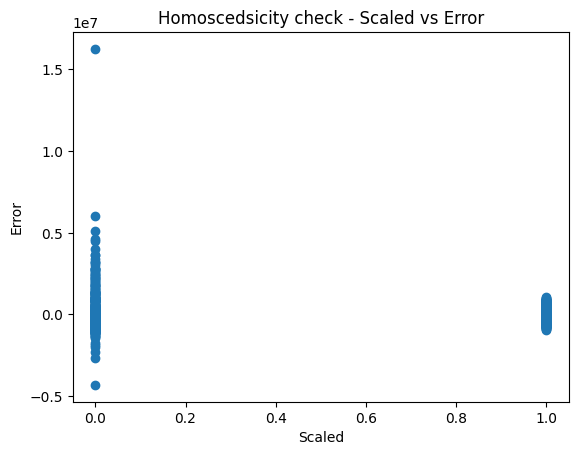

In [40]:
for i in x:
    plt.scatter(x = x_test[i],y = error_test)
    plt.title('Homoscedsicity check - Scaled vs Error')
    plt.xlabel('Scaled')
    plt.ylabel('Error')
    plt.show()

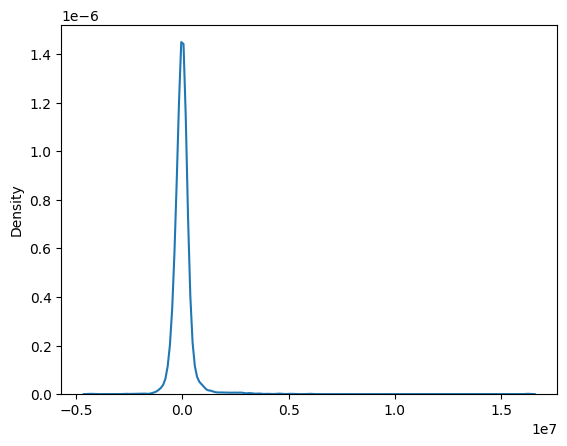

In [41]:
sns.distplot(a=error_test,hist=False)
plt.show()

In [45]:
import pickle 
pickle_out = open("cars.pkl","wb")
pickle.dump(mlr, pickle_out)
pickle_out.close()

In [47]:
!pip install streamlit